

# Project: Investigate a Dataset No - "show appointments"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  In this project, we'll be analysing a dataset related to medical appointments in Brazil.that is we are going to find answers to few questions related to the data of  patient's whether showing up for an appointment or not.
> the dataset is a collection of 100k medical appointments in brazil.the data has
### The dataset contains 14 attributes:

- PatientID - Identification of the patient
- AppointmentID - Identification of each appointment
- Gender - Male or Female (M/F)
- ScheduledDay - The day of the appointment
- AppointmentDay - The day the appointment was made
- Age - The age of the patient
- Neighbourhood - Where the appointment takes place
- Scholarship - True or False
- Hipertension - True or False
- Diabetes - True or False
- Alcoholism - True or False
- Handicap - True or False
- SMS_received - 1 or more messages sent to the patient
- No-show - Yes or No. Yes indicates that the patient did not turn up for the appointment.


<a id='wrangling'></a>
## Data Wrangling





### General Properties

In [212]:
#importing all the required librarys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [213]:
#loading the dataset and reading csv
df = pd.read_csv('noshowappointments.csv')

In [214]:
# first 6 rows of the dataset:
df.head(6)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [215]:
# the number of rows and columns in a dataset
df.shape

(110527, 14)

In [216]:
# statistics for all columns of the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [217]:
#columns names in the dataset
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [218]:
# unuique values count information
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [219]:
# information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### we have found enough information from the dataset and it time to clean it for the best fit



### Data cleaning

- making all columns lowercase for easy going

In [220]:
# all columns are now lowercase letters
df.columns=df.columns.str.strip().str.lower()
df.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

In [221]:
#null values
df.isnull().sum()

patientid         0
appointmentid     0
gender            0
scheduledday      0
appointmentday    0
age               0
neighbourhood     0
scholarship       0
hipertension      0
diabetes          0
alcoholism        0
handcap           0
sms_received      0
no-show           0
dtype: int64

- no null values

- There are 48,228 duplicated thet mean same patients has made appointment more than one 

In [222]:
# there are some duplicated values in patientid
df['patientid'].duplicated().sum()

48228

In [223]:
df.drop(['patientid', 'appointmentid'], axis=1, inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hipertension', 'diabetes', 'alcoholism', 'handcap',
       'sms_received', 'no-show'],
      dtype='object')

- dropping columns that we are not going to use

In [224]:
#making sure that there will be no negative values 
df = df[df['age'] >= 0]

df['age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

- correcting name mistakes and formate

In [225]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [226]:
df.rename(columns={'no-show':'noshow', 'sms_received':'smsreceived','hipertension':'hypertension','handcap':'handicap'}, inplace=True)
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'smsreceived', 'noshow'],
      dtype='object')

- changing some column values to bool

In [227]:
#making all ones and zeros valued columns in bools 
df['diabetes'] = df['diabetes'].replace({0: 'No', 1: 'Yes'})
df['hypertension'] = df['hypertension'].replace({0: 'No', 1: 'Yes'})
df['scholarship'] = df['scholarship'].replace({0: 'No', 1: 'Yes'})
df['alcoholism'] = df['alcoholism'].replace({0: 'No', 1: 'Yes'})
df['handicap'] = df['handicap'].replace({0: 'No', 1: 'Yes'})
df['smsreceived'] = df['smsreceived'].replace({0: 'No', 1: 'Yes'})
df['noshow'] = df['noshow'].replace({0: 'No', 1: 'Yes'})

In [228]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,No,No,No,No,No,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,No,No,No,No,No,No,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No


#### And last one we are going to change 'scheduledday' and 'appointmentday'in correct formate because it difficult to make analysis with that formate

In [229]:
import datetime as dt
df['scheduledday'] = pd.to_datetime(df['scheduledday']).dt.date
df['appointmentday'] = pd.to_datetime(df['appointmentday']).dt.date
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No


Now date in correct formate is ready but still that is not enough,we have to address some questions relating to time gap between the appointments 

In [230]:
df['daysgap'] = df['appointmentday']  -  df['scheduledday']
df.columns

Index(['gender', 'scheduledday', 'appointmentday', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'smsreceived', 'noshow', 'daysgap'],
      dtype='object')

In [231]:
df.dtypes

gender                     object
scheduledday               object
appointmentday             object
age                         int64
neighbourhood              object
scholarship                object
hypertension               object
diabetes                   object
alcoholism                 object
handicap                   object
smsreceived                object
noshow                     object
daysgap           timedelta64[ns]
dtype: object

In [232]:
df['daysgap'] = df['daysgap'].dt.components.days

In [233]:

df['daysgap'].describe()


count    110526.000000
mean         10.183794
std          15.255034
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: daysgap, dtype: float64

In [234]:
df.drop(index=df[df['daysgap'] < 0].index, inplace=True)

In [235]:
df.head(2)

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow,daysgap
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No,0


In [236]:
df = df[df['daysgap'] >= 0]
df['daysgap'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: daysgap, dtype: float64

#### We have cleaned almost every attributes one by one ✌

# Exploratory data analysis

In [237]:
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,smsreceived,noshow,daysgap
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,No,Yes,No,No,No,No,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,No,No,No,No,No,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,No,No,No,No,No,No,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,No,No,No,No,No,No,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,No,Yes,Yes,No,No,No,No,0


### Time period

In [238]:

df['appointmentday'].min(), df['appointmentday'].max()

(datetime.date(2016, 4, 29), datetime.date(2016, 6, 8))

- this data is around from 29-04-2016 to 08-06-2016

#### let us know the gender show up details and their count 

In [239]:
# table
gender = pd.crosstab(index=df["gender"],
            columns=df["noshow"])
gender

noshow,No,Yes
gender,,
F,57245,14591
M,30962,7723


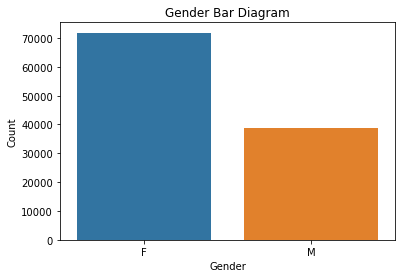

In [240]:
# plot 
sns.countplot(df['gender']);
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Bar Diagram');

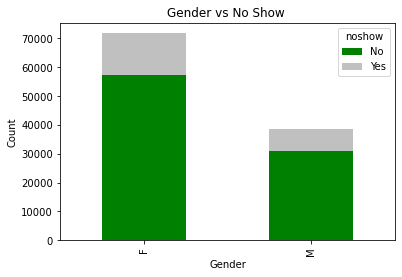

In [241]:
# plot 
gender.plot(kind='bar',stacked = True,color=['green','silver'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender vs No Show ');

-  More female patient than male patient in dataset.


### Most important thing we sholud know first - How many showed up and how many did not for the appointment

- let us know somethings about show-ups

In [242]:
# using groupby 
new_df = df.groupby('noshow')['noshow'].agg(['count'])
new_df.reset_index(inplace=True)
new_df.columns = ['appt_status', 'total']
new_df.iloc[0,0] = "Show"
new_df.iloc[1,0] = "No Show"

### we can here use histogram but piechart looks more informative 

In [243]:
#  cooking percentages
nos_prop = new_df.iloc[0,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])
shows_prop = new_df.iloc[1,1] / (new_df.iloc[0,1] + new_df.iloc[1,1])

new_df['percentages'] = [nos_prop, shows_prop]
new_df.head

<bound method NDFrame.head of   appt_status  total  percentages
0        Show  88207     0.798102
1     No Show  22314     0.201898>

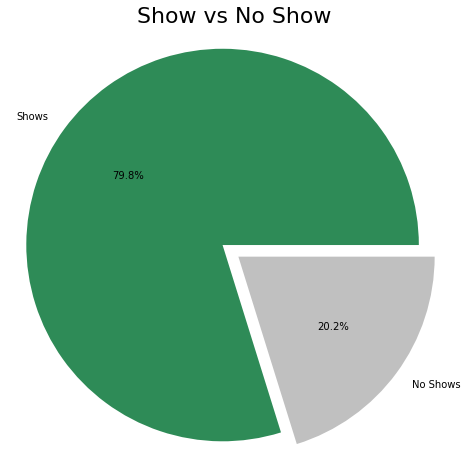

In [244]:
#ploting the 'PIE'
labels = ['Shows', 'No Shows']
sizes = [nos_prop, shows_prop]
colors = ['seagreen', 'silver']
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title(' Show vs No Show',fontsize=22)
plt.axis('equal')
fig = plt.gcf()
fig.set_size_inches(8,8);


- Here we can easily understand that almost 80% showed up.
- 20% patients did not show up. 

### Lets see how alcoholism effecting the appointments

In [245]:
df.alcoholism.value_counts()

No     107161
Yes      3360
Name: alcoholism, dtype: int64

In [246]:
df.alcoholism.value_counts(normalize=True) * 100


No     96.959854
Yes     3.040146
Name: alcoholism, dtype: float64

In [247]:
df.groupby(["noshow","alcoholism"], as_index=False).size()

noshow  alcoholism
No      No            85524
        Yes            2683
Yes     No            21637
        Yes             677
dtype: int64

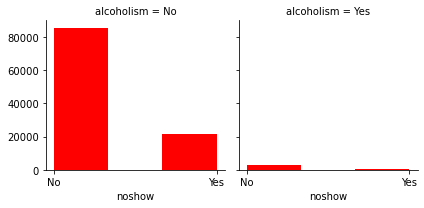

In [248]:
bar = sns.FacetGrid(df, col = 'alcoholism')
bar.map(plt.hist, 'noshow', bins = 3,color='red');

- Not more that 5% patients are alcoholic
- More intresting thing is more that 95% showed up



# Conclusions

### Results

- Alcohilic does not have huge impact on the appointments

- Gender even has't any infulunce on the show up of appointments

- The is slight difference of missing appointments between male and female.

- 20% patients did not show up and due to this most important time and oppotunity of using care is lost 

- Showup and not showup count almost same (80:20)

### Limitations

- the time period is limited so that the available information may not be suffient for accurate results
- This analysis is based solely on observations
- there are some values like age =o which are baby's they cant be removed and they alone cant attend appointments.
- Lots of the columns used categorical data which is difficult to analyze and find insights